In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
# encoding -> [S, E, P, a, b, c, d, ... 습, 사, 랑] : 각 단어마다 0부터 인덱싱
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀연습사랑'] # 범주형 데이터
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)
print(dic_len) # 41
# seq2seq 번역망
seq_data = [['word', '단어'], ['wood', '나무'],['game', '놀이'], ['girl', '소녀'],['test', '연습'], ['love', '사랑']]
def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
    for seq in seq_data: # ['word', '단어']
        input = [num_dic[n] for n in seq[0]] # 'word' => 번호 25,17, ...
        # 첫번째 입력되는 데이터는 'word'이 학습된 smoking gun
        output = [num_dic[n] for n in ('S' + seq[1])]
        target = [num_dic[n] for n in (seq[1]) + 'E'] # 끝을 확인
        # identity matrix 단위행렬 => one-hot-encoding
        # 1 , 00000000
        # 0, 1,00000000
        # 0,0, 1
        input_batch.append(np.eye(dic_len)[input]) # 25, 17 - 2차원 배열 4x41
        output_batch.append(np.eye(dic_len)[output]) # 2x41
        target_batch.append(target)
    return input_batch, output_batch, target_batch
learning_rate = 0.01
n_hidden = 128
total_epoch = 100
n_class = n_input = dic_len # 42
# encoder, decoder 용 데이터 주입변수
enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])
with tf.variable_scope('encode'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden) # 입력 41 x 128
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5, seed = 100) 
    # dropout - 과적합 방지 위해 계산회로 생략 - random 하게 생략
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype=tf.float32) # 셀이 4개, 셀당 41개 데이터 들어옴
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden) # 128
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5) 
    # 2 x 41
    # 앞의 인코더망에서 출력된 states 값: 마지막 cell의 출력
    # 앞의 데이터를 다 고려한 특징
    # 두 개의 망을 연결 initial_state=enc_states
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input, initial_state = enc_states, dtype=tf.float32)
# 6 x 3 x 41
model = tf.layers.dense(outputs, n_class, activation = None)
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels = targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

41


In [25]:
import pprint
pprint.pprint(num_dic)

{'E': 1,
 'P': 2,
 'S': 0,
 'a': 3,
 'b': 4,
 'c': 5,
 'd': 6,
 'e': 7,
 'f': 8,
 'g': 9,
 'h': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 15,
 'n': 16,
 'o': 17,
 'p': 18,
 'q': 19,
 'r': 20,
 's': 21,
 't': 22,
 'u': 23,
 'v': 24,
 'w': 25,
 'x': 26,
 'y': 27,
 'z': 28,
 '나': 31,
 '녀': 36,
 '놀': 33,
 '단': 29,
 '랑': 40,
 '무': 32,
 '사': 39,
 '소': 35,
 '습': 38,
 '어': 30,
 '연': 37,
 '이': 34}


In [26]:
input_batch, output_batch, target_batch = make_batch(seq_data)
for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost], feed_dict = {enc_input: input_batch,
                                                      dec_input: output_batch,
                                                      targets: target_batch})
    print('Epoch: ', '%04d' % (epoch + 1),
          'cost = ', '{:6f}'.format(loss))

Epoch:  0001 cost =  3.675198
Epoch:  0002 cost =  2.318069
Epoch:  0003 cost =  1.080398
Epoch:  0004 cost =  0.483081
Epoch:  0005 cost =  0.200079
Epoch:  0006 cost =  0.120887
Epoch:  0007 cost =  0.076252
Epoch:  0008 cost =  0.052442
Epoch:  0009 cost =  0.026597
Epoch:  0010 cost =  0.015050
Epoch:  0011 cost =  0.007978
Epoch:  0012 cost =  0.004991
Epoch:  0013 cost =  0.002917
Epoch:  0014 cost =  0.001745
Epoch:  0015 cost =  0.001153
Epoch:  0016 cost =  0.000847
Epoch:  0017 cost =  0.000677
Epoch:  0018 cost =  0.000575
Epoch:  0019 cost =  0.000509
Epoch:  0020 cost =  0.000464
Epoch:  0021 cost =  0.000430
Epoch:  0022 cost =  0.000402
Epoch:  0023 cost =  0.000377
Epoch:  0024 cost =  0.000350
Epoch:  0025 cost =  0.000322
Epoch:  0026 cost =  0.000293
Epoch:  0027 cost =  0.000263
Epoch:  0028 cost =  0.000236
Epoch:  0029 cost =  0.000211
Epoch:  0030 cost =  0.000189
Epoch:  0031 cost =  0.000169
Epoch:  0032 cost =  0.000153
Epoch:  0033 cost =  0.000139
Epoch:  00

In [27]:
def translate(word): # word
    # 모델의 자리수는 일치시켜야 함
    seq_data = [word, 'P' * len(word)] # PPPP
    input_batch, output_batch, target_batch = make_batch([seq_data]) # word 1x4x41 # 'P' 1x4x41
    # 1x5x41
    prediction = tf.argmax(model, 2) # 면, 행, (열을 중심하고): 41개 중 max
    result = sess.run(prediction, feed_dict = {enc_input: input_batch, dec_input: output_batch, targets: target_batch})
    decoded = [char_arr[i] for i in result[0]] # 5
    end = decoded.index('E')
    translated = ''.join(decoded[:end])
    return translated
print('word ->', translate('word'))

word -> 단어


# OCR : Kakao API

https://developers.kakao.com/docs/restapi/vision#%EB%AC%B8%EC%9E%90-%EC%9D%B8%EC%8B%9D

In [62]:
import json
import cv2 # computer vision tool (이미지, 동영상 처리)
import requests # html 페이지 요청
import sys
LIMIT_PX = 1024
LIMIT_BYTE = 1028*1024
LIMIT_BOX = 40
# OCR 절차
# 이미지 사이즈 조정
# 글씨를 둘러싼 Box를 detection

In [63]:
def kakao_ocr_resize(image_path: str):
    image = cv2.imread('2.jpg')
    height, width, _ = image.shape
    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(heigth, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape
        image_path = "{}_resize.jpg".format('2')
        cv2.imwrite(image_path, image)
        return image_path
    return None

In [75]:
# 사용법
# open api 함수를 원격호출 (remote call)
def kakao_ocr_detect(image_path: str, appkey: str):
    API_URL ='https://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization': 'KakaoAK {}'.format('5dc4d50e5b850c0b040d5c308ef6e3c4')}
    image = cv2.imread('2.jpg') # 이미지 로드
    # naver는 jpg만, gif 애니메이션 지원, png 투명도 지원
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes() # 네크워크 전송 -> serialization
    # 네트워크일 때 => 데이터가 시리얼로 가야 함 (모뎀)
    # 8개 라인으로 구성, 4개 회선만 사용 (1개 전송, 1개 수신)
    # 네트워크를 통해 함수 호출 (시간) : 비동기 방식
    # 동기 방식(호출 후 돌아올 때까지 기다림), 비동기 방식(다른 작업 중 -event 받아서 작업)
    # 대표적인 비동기 통신 방식이 AJAX : 웹 브라우저 내부적 처리
    # 인터넷 표준 데이터 형식 json
    return requests.post(API_URL, headers=headers, files={"file": data})


In [76]:
def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
    headers = {'Authorization': 'KakaoAK {}'.format('5dc4d50e5b850c0b040d5c308ef6e3c4')}
    image = cv2.imread('2.jpg')
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes()
    # 인식은 BOX로 텍스트 구역을 확인하고, recognize 인식한다.
    return requests.post(API_URL, headers=headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

In [77]:
def main():
    image_path, appkey = sys.argv[1], sys.argv[2]
    resize_impath = kakao_ocr_resize(image_path)
    output = kakao_ocr_detect(image_path, appkey).json()
    boxes = output['result']['boxes']
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    return output
output = main()
output['result']

{'recognition_words': ['(고',
  '객',
  '용)',
  "Le수'용og제",
  '전표번호',
  '020298',
  '못향점',
  '김태준의',
  '탕탕집',
  '김태준',
  '서울',
  '강남구',
  '학동로4길',
  '12,',
  '1,2층(논현동)',
  '대표지',
  'TEL',
  '02-511-3235',
  '사업자',
  '536-37-00183',
  '물기',
  '6.',
  '818',
  '682',
  '줄',
  '이버',
  '새',
  '500',
  '',
  'IBKUI씨P두',
  '일시불',
  '카드번호',
  '6250-03**-****',
  '-4903 (C)',
  '거래일시',
  '2018/01/30',
  '12:46:24',
  'N',
  '12110079',
  '비씨카드사']}

# 카카오에서 퍼온 소스
- 소스코드
https://developers.kakao.com/docs/restapi/vision
- REST API 넘버
https://developers.kakao.com/apps/393152/created

In [78]:
import json
import cv2
import requests
import sys

LIMIT_PX = 1024
LIMIT_BYTE = 1024*1024  # 1MB
LIMIT_BOX = 40

def kakao_ocr_resize(image_path: str):
    """
    ocr detect/recognize api helper
    ocr api의 제약사항이 넘어서는 이미지는 요청 이전에 전처리가 필요.

    pixel 제약사항 초과: resize
    용량 제약사항 초과  : 다른 포맷으로 압축, 이미지 분할 등의 처리 필요. (예제에서 제공하지 않음)

    :param image_path: 이미지파일 경로
    :return:
    """
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(height, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape

        # api 사용전에 이미지가 resize된 경우, recognize시 resize된 결과를 사용해야함.
        image_path = "{}_resized.jpg".format(image_path)
        cv2.imwrite(image_path, image)
        return image_path
    return None

def kakao_ocr_detect(image_path: str, appkey: str):
    """
    detect api request example
    :param image_path: 이미지파일 경로
    :param appkey: 카카오 앱 REST API 키
    """
    API_URL = 'https://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization': 'KakaoAK {}'.format(appkey)}
    image = cv2.imread(image_path)
    jpeg_image = cv2.imencode(".jpg", image)[1]
    data = jpeg_image.tobytes()
    return requests.post(API_URL, headers=headers, files={"file": data})

def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
    """
    recognize api request example
    :param boxes: 감지된 영역 리스트. Canvas 좌표계: 좌상단이 (0,0) / 우상단이 (limit,0)
                    감지된 영역중 좌상단 점을 기준으로 시계방향 순서, 좌상->우상->우하->좌하
                    ex) [[[0,0],[1,0],[1,1],[0,1]], [[1,1],[2,1],[2,2],[1,2]], ...]
    :param image_path: 이미지 파일 경로
    :param appkey: 카카오 앱 REST API 키
    """
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
    headers = {'Authorization': 'KakaoAK {}'.format(appkey)}
    image = cv2.imread(image_path)
    jpeg_image = cv2.imencode(".jpg", image)[1]
    data = jpeg_image.tobytes()
    return requests.post(API_URL, headers=headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

def main():
    if len(sys.argv) != 3:
        print("Please run with args: $ python example.py /path/to/image appkey")
    #image_path, appkey = sys.argv[1], sys.argv[2]
    image_path, appkey = "2.jpg", "5dc4d50e5b850c0b040d5c308ef6e3c4"
    resize_impath = kakao_ocr_resize(image_path)
    if resize_impath is not None:
        image_path = resize_impath
        print("원본 대신 리사이즈된 이미지를 사용합니다.")
    output = kakao_ocr_detect(image_path, appkey).json()
    print("[detect] output:\n{}\n".format(output))
    boxes = output["result"]["boxes"]
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    print("[recognize] output:\n{}\n".format(json.dumps(output, sort_keys=True, indent=2, ensure_ascii=False)))

if __name__ == "__main__":
    main()

[detect] output:
{'result': {'boxes': [[[445, 131], [508, 129], [509, 152], [446, 155]], [[532, 128], [571, 128], [571, 150], [532, 150]], [[602, 127], [659, 127], [659, 150], [602, 150]], [[136, 139], [352, 136], [353, 181], [136, 184]], [[479, 156], [562, 156], [562, 177], [479, 177]], [[597, 155], [663, 151], [664, 168], [598, 172]], [[134, 167], [202, 167], [202, 237], [134, 237]], [[240, 191], [323, 188], [323, 208], [240, 211]], [[333, 187], [399, 183], [401, 206], [334, 209]], [[239, 240], [297, 235], [299, 255], [241, 261]], [[240, 216], [279, 216], [279, 233], [240, 233]], [[292, 213], [357, 210], [358, 231], [293, 234]], [[367, 210], [466, 207], [466, 228], [368, 230]], [[479, 205], [512, 205], [512, 226], [479, 226]], [[522, 202], [663, 199], [664, 222], [523, 225]], [[139, 240], [202, 240], [202, 262], [139, 262]], [[481, 254], [512, 256], [510, 274], [480, 272]], [[542, 253], [668, 250], [668, 268], [543, 271]], [[141, 265], [203, 265], [203, 285], [141, 285]], [[238, 265]

In [92]:
import cv2
import numpy as np
history = 30
cap = cv2.VideoCapture("corrupted_video.mp4") 
# cap = cv2.VideoCapture(0) 0번 디바이스 - 카메라 영상을 받아들임
if(cap.isOpened()==False): # 파일이 없거나 장치가 없거나
    print("에러 발생")
fgbg = cv2.createBackgroundSubtractorMOG2() # 백그라운드 필터
while(cap.isOpened()):
    ret, frame = cap.read() # 1개의 frame => 동영상은 ntsc 방식 초당 29.7 프레임
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fgmask=fgbg.apply(gray, learningRate=1.0/history)
        cv2.imshow('Frame', fgmask) # 이미지 출력
        # 16진수 15, esc
        if cv2.waitKey(25) & 0xFF == ord('q'): # ascii code 코드표
            break 
    else:
        break
cap.release()
cv2.destroyAllWindows()

In [93]:
# 동영상 저장하기
import cv2 # computer vision 처리 -> 사운드 불가
import numpy as np
cap = cv2.VideoCapture("corrupted_video.mp4") # 동영상 삽입
fourcc = cv2.VideoWriter_fourcc(*'XVID') # 코덱 설치해야 함
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame,0) # 자동 차선인식, object detection
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 고속
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

# https://www.ffmpeg.org/download.html - 소스코드 다운 받기
# https://ffmpeg.zeranoe.com/builds/ - 여기서 다운
# 압축 풀어서 폴더 째로 c드라이브에 잘라 붙여넣기
# 환경 변수 설정하기

# AE(AutoEncoder)

# Denoising AutoEncoder
- 원본, 노이즈가 있는 학습 데이터
- 학습은 노이즈가 있는 학습 데이터 => 가중치
- autoencoder는 denoising을 한다.

In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
def vis(images, save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim * 1.0/n_image_rows))
    gs = gridspec.GridSpec(n_image_rows, n_image_cols, top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)
    for g,count in zip(gs, range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count,:].reshape((28,28)))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig(save_name + '_vis.png')
    plt.show()
mnist_width = 28
n_visible = mnist_width * mnist_width
n_hidden = 500

In [7]:
corruption_level = 0.3
X = tf.placeholder("float", [None, n_visible], name="X")
mask = tf.placeholder("float", [None, n_visible], name="mask")
W_init_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
W_init = tf.random_uniform(shape=[n_visible, n_hidden], minval=-W_init_max, maxval=W_init_max)
W = tf.Variable(W_init, name="W")
b = tf.Variable(tf.zeros([n_hidden]), name="b")

In [8]:
W_prime = tf.transpose(W) # 자기 자신의 전치
b_prime = tf.Variable(tf.zeros([n_visible]), name="b_prime")
def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X # 행렬 요소곱
    Y = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b)
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime)
    return Z

Z = model(X, mask, W, b, W_prime, b_prime)
# 가중치에 이미지의 특성이 추출

In [9]:
# X가 원본데이터, Z가 예측데이터. X==Z(자기 자신)
# 비지도학습: 데이터의 특징: PCA 데이터 재해석(직교하는 축으로)
# autoencoder input:자기자신 == output도 자기자신
# noise: 군데군데 빵구 - 원본의 특징을 추출
cost=tf.reduce_sum(tf.pow(X-Z, 2))
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op = Z
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


0 111614.44
1 96284.61
2 86868.33
3 81963.54
4 79796.18
5 74437.29
6 72493.17
7 71510.57
8 70673.84
9 69010.805
10 69252.734
11 68583.14
12 65780.37
13 66691.34
14 65747.61
15 65411.85
16 64320.246
17 63478.195
18 65213.78
19 63629.957
20 63594.777
21 63718.34
22 62918.633
23 61611.266
24 62465.473
25 61575.027
26 61687.344
27 61264.387
28 62815.188
29 61496.926
30 60629.082
31 60880.234
32 61536.92
33 61010.914
34 61573.83
35 60345.594
36 60509.426
37 60683.88
38 60662.812
39 60560.766
40 60798.64
41 59845.566
42 59936.438
43 60115.754
44 59439.266
45 59283.582
46 59425.504
47 58851.445
48 59843.492
49 59361.047
50 59122.84
51 59682.332
52 58722.99
53 58743.54
54 58407.523
55 59228.184
56 59772.727
57 59014.207
58 58645.156
59 58845.92
60 58440.05
61 59308.08
62 58269.273
63 58151.055
64 58835.133
65 58271.6
66 58355.324
67 58088.688
68 58485.78
69 58614.688
70 58239.023
71 58243.87
72 58469.65
73 58195.277
74 58303.68
75 57432.383
76 57822.84
77 57674.79
78 58014.68
79 56845.047
80 5

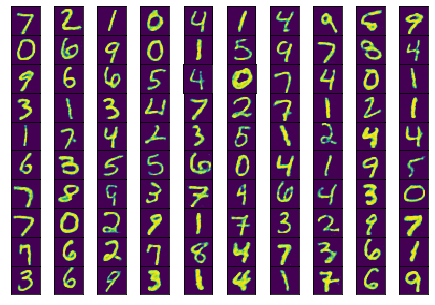

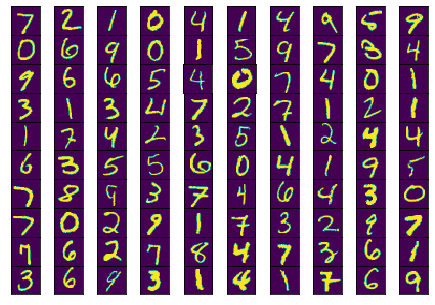

In [10]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            input_ = trX[start:end]
            mask_np = np.random.binomial(1, 1-corruption_level, input_.shape)
            sess.run(train_op, feed_dict={X:input_, mask:mask_np})
        mask_np = np.random.binomial(1, 1-corruption_level, teX.shape)
        print(i, sess.run(cost, feed_dict={X: teX, mask: mask_np}))
    mask_np = np.random.binomial(1, 1- corruption_level, teX[:100].shape)
    predicted_imgs = sess.run(predict_op, feed_dict={X: teX[:100], mask:mask_np}) # 예측할 때 
    input_imgs = teX[:100]
vis(predicted_imgs, 'pred') # 예측된 이미지
vis(input_imgs, 'in') # 입력 이미지

# 판별 모델(Discrminative model)
# Variational AutoEncoder (VAE)
- Generative Model 생성 모델 => 확률 평균 + 분산(분포)
- 잠재변수 (Latent Variables): 이미지를 보고 키가 몇인지, 남자인지 등 특징을 잡아냄

In [11]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

ops.reset_default_graph()
#train, test = tf.keras.datasets.mnist.load_data()
#train_x, train_y = train
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

from functools import partial
n_inputs = 28 * 28 # 784
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs # 입력이 출력으로
learning_rate = 0.001

# scaling없이 초기화
initializer = tf.contrib.layers.variance_scaling_initializer()

In [12]:
my_dense_layer = partial(tf.layers.dense, activation = tf.nn.elu, kernel_initializer=initializer) # 매개변수 일부를 고정
X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2) # Exponential linear Unit
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma= my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise # 평균, 분산 * 노이즈
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
logits = my_dense_layer(hidden5, n_outputs, activation=None)
outputs= tf.sigmoid(logits)

In [13]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy) # 재구축 손실
# epsilon 상수: 부동소수점을 비교 0.0001: 차가 0.0001 이하면 같은 것으로 본다
eps = 1e-10 # epsilon 상수: 로그의 성질 - 0이면 무한대
# cost function
# 지연손실( 확률 분포 곡선 )
latent_loss = 0.5 * tf.reduce_sum(tf.square(hidden3_sigma)+tf.square(hidden3_mean) -1 - tf.log(eps+tf.square(hidden3_sigma))) 
loss = reconstruction_loss + latent_loss
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [14]:
import sys
n_digits = 60
n_epochs = 50
batch_size = 150
with tf.Session() as sess:
    init.run()
    for epoch in range(0, n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss],
                                                                     feed_dict={X: X_batch})
        print("\r{}".format(epoch),
              "Train total loss:", loss_val,
              "\tReconstruction loss:", reconstruction_loss_val,
              "\tLatent loss:", latent_loss_val)
    codings_rnd = np.random.normal(size=[n_digits, n_hidden3])
    outputs_val = outputs.eval(feed_dict={hidden3: codings_rnd})
    
# 가중치를 통과한 데이터(test) : 모델 완성
# PCA처럼 비지도학습의 특성으로 추출된 데이터(분류와 예측0000)

0 Train total loss: 31464.072 	Reconstruction loss: 23537.154 	Latent loss: 7926.9185
1 Train total loss: 28090.201 	Reconstruction loss: 23489.176 	Latent loss: 4601.0254
2 Train total loss: 27583.947 	Reconstruction loss: 21551.486 	Latent loss: 6032.461
3 Train total loss: 28652.113 	Reconstruction loss: 23626.566 	Latent loss: 5025.547
4 Train total loss: 23419.246 	Reconstruction loss: 19812.842 	Latent loss: 3606.404
5 Train total loss: 28828.11 	Reconstruction loss: 23426.443 	Latent loss: 5401.667
6 Train total loss: 21746.441 	Reconstruction loss: 17366.797 	Latent loss: 4379.6436
7 Train total loss: 19670.498 	Reconstruction loss: 16568.809 	Latent loss: 3101.6897
8 Train total loss: 18102.115 	Reconstruction loss: 15109.191 	Latent loss: 2992.9233
9 Train total loss: 16985.057 	Reconstruction loss: 13942.708 	Latent loss: 3042.3481
10% Train total loss: 16249.064 	Reconstruction loss: 13239.058 	Latent loss: 3010.0066
11 Train total loss: 16428.072 	Reconstruction loss: 1330